In [1]:
import pandas as pd
df=pd.read_csv('kijiji.csv')

In [2]:
df.head()

,CSDUID,CSDNAME,Latitude,Longitude,adId,Title,Type,Price,Location,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type,URL,Date Posted
0,3501005,South Glengarry,45.256161,-74.595385,1618448386,2 Bedroom Apartment For Rent In Green Valley,Apartment,"$1,425","Green Valley, ON K0C 1L0",Bedrooms: 2,Bathrooms: 1,N,Y,Y,950,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/25/2022 4:30
1,3501005,South Glengarry,45.192003,-74.374604,1617525343,Private 2 BDR in-law-suite upstairs. 1Aug. $1...,Apartment,"$1,100","21882 Old Hwy 2, Bainsville, ON K0C 1E0, Canada",Bedrooms: 2,Bathrooms: 1,N,N,Y,780,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/18/2022 12:34
2,3501005,South Glengarry,45.146672,-74.579565,1609020142,Beautiful Country House near Williamstown - $2...,House,"$2,700","Williamstown, ON K0C 2J0",Bedrooms: 3,Bathrooms: 2.5,N,Y,Y,"2,200",1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/21/2022 21:51
3,3501005,South Glengarry,45.143726,-74.502708,1617264438,"6686 Lawrence st, South Glengarry K6h 5r5",House,"$1,200","6686 Lawrence St, Cornwall, South Glengarry, ON",Bedrooms: 2,Bathrooms: 1.5,N,N,Y,900,1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 15:41
4,3501005,South Glengarry,45.068973,-74.542873,1617233473,Water Front House for Rent Long Term,House,"$4,000","19414 Malibu Ln, Summerstown, ON K0C 2E0, Canada",Bedrooms: 2 + Den,Bathrooms: 3,N,Y,Y,"1,400",1 Year,https://www.kijiji.ca/v-apartments-condos/corn...,5/16/2022 11:33


In [3]:
df=df.drop(['CSDUID','Title','Location','adId','URL','Date Posted','Agreement Type'],axis=1)

In [4]:
df.columns

Index(['CSDNAME', 'Latitude', 'Longitude', 'Type', 'Price', 'Bedrooms',
       'Bathrooms', 'Hydro', 'Heat', 'Water', 'Size'],
      dtype='object')

In [5]:
for NAN in df.columns:
  if df[NAN].isna().any()==True:
    print("Missing values=".format(NAN))
    print(df[NAN].isna().sum())

Missing values=
3660


In [6]:
df.dtypes

CSDNAME       object
Latitude     float64
Longitude    float64
Type          object
Price         object
Bedrooms      object
Bathrooms     object
Hydro         object
Heat          object
Water         object
Size          object
dtype: object

In [7]:
df['CSDNAME']=df['CSDNAME'].convert_dtypes()
df['Type']=df['Type'].convert_dtypes()
df['Price']=df['Price'].str.replace('$','')
df['Price']=df['Price'].str.replace(',','')
df['Price']=df['Price'].convert_dtypes()
df['Bedrooms']=df['Bedrooms'].convert_dtypes()
df['Bathrooms']=df['Bathrooms'].convert_dtypes()
df['Heat']=df['Heat'].convert_dtypes()
df['Hydro']=df['Hydro'].convert_dtypes()
df['Water']=df['Water'].convert_dtypes()
df['Size']=df['Size'].str.replace(',','')
df['Size']=df['Size'].convert_dtypes()

<ipython-input-7-ceebe6ef724f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','')


In [8]:
df.dtypes

CSDNAME       string
Latitude     float64
Longitude    float64
Type          string
Price         string
Bedrooms      string
Bathrooms     string
Hydro         string
Heat          string
Water         string
Size          string
dtype: object

In [9]:
df['Bedrooms'].value_counts()

Bedrooms: 2                  7225
Bedrooms: 1                  6559
Bedrooms: 3                  4890
Bedrooms: 4                  1678
Bedrooms: 1 + Den            1478
Bedrooms: Bachelor/Studio    1316
Bedrooms: 2 + Den            1029
Bedrooms: 3 + Den             800
Bedrooms: 5+                  470
Bedrooms: 4 + Den             287
Name: Bedrooms, dtype: Int64

In [10]:
df['Bedrooms']=df['Bedrooms'].str.replace('Bedrooms:' ,'')
df['Bedrooms']=df['Bedrooms'].str.replace('\+ Den','.5')
df['Bedrooms']=df['Bedrooms'].str.replace(' ','')
df['Bedrooms']=df['Bedrooms'].str.replace('Bachelor/Studio','0.5')
df['Bedrooms']=df['Bedrooms'].str.replace('\+','')

<ipython-input-10-735e03e7b5cc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Bedrooms']=df['Bedrooms'].str.replace('\+ Den','.5')
<ipython-input-10-735e03e7b5cc>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Bedrooms']=df['Bedrooms'].str.replace('\+','')


In [11]:
df

,CSDNAME,Latitude,Longitude,Type,Price,Bedrooms,Bathrooms,Hydro,Heat,Water,Size
0,South Glengarry,45.256161,-74.595385,Apartment,1425,2,Bathrooms: 1,N,Y,Y,950
1,South Glengarry,45.192003,-74.374604,Apartment,1100,2,Bathrooms: 1,N,N,Y,780
2,South Glengarry,45.146672,-74.579565,House,2700,3,Bathrooms: 2.5,N,Y,Y,2200
3,South Glengarry,45.143726,-74.502708,House,1200,2,Bathrooms: 1.5,N,N,Y,900
4,South Glengarry,45.068973,-74.542873,House,4000,2.5,Bathrooms: 3,N,Y,Y,1400
...,...,...,...,...,...,...,...,...,...,...,...
25727,Kenora,49.799160,-94.476801,Apartment,1100,2,Bathrooms: 1,N,Y,Y,900
25728,Kenora,49.778994,-94.475101,House,2700,3,Bathrooms: 2,N,N,Y,1700
25729,"Kenora, Unorganized",49.725858,-94.334363,House,3000,2,Bathrooms: 1,Y,Y,Y,1440
25730,"Kenora, Unorganized",49.693670,-92.494754,House,1800,2,Bathrooms: 1,N,N,Y,1153


In [12]:
df['Bedrooms'].value_counts()

2      7225
1      6559
3      4890
4      1678
1.5    1478
0.5    1316
2.5    1029
3.5     800
5       470
4.5     287
Name: Bedrooms, dtype: Int64

In [13]:
df['Bathrooms'].value_counts()

Bathrooms: 1      16835
Bathrooms: 2       3562
Bathrooms: 2.5     1971
Bathrooms: 1.5     1373
Bathrooms: 3       1052
Bathrooms: 3.5      465
Bathrooms: 4        381
Bathrooms: 5         50
Bathrooms: 4.5       35
Bathrooms: 5.5        5
Bathrooms: 6+         3
Name: Bathrooms, dtype: Int64

In [14]:
df['Bathrooms']=df['Bathrooms'].str.replace('Bathrooms: ' ,'')
df['Bathrooms']=df['Bathrooms'].str.replace('\+','')

<ipython-input-14-a56c36b8c48c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Bathrooms']=df['Bathrooms'].str.replace('\+','')


In [15]:
df['Bathrooms'].value_counts()

1      16835
2       3562
2.5     1971
1.5     1373
3       1052
3.5      465
4        381
5         50
4.5       35
5.5        5
6          3
Name: Bathrooms, dtype: Int64

In [16]:
df.dtypes

CSDNAME       string
Latitude     float64
Longitude    float64
Type          string
Price         string
Bedrooms      string
Bathrooms     string
Hydro         string
Heat          string
Water         string
Size          string
dtype: object

In [17]:
df['Price']=pd.to_numeric(df['Price'],errors='coerce')
df['Price']=pd.to_numeric(df['Price'])
TargetLabel=df['Price']
df['Bedrooms']=pd.to_numeric(df['Bedrooms'],errors='coerce')
df['Bedrooms']=pd.to_numeric(df['Bedrooms'])
df['Bathrooms']=pd.to_numeric(df['Bathrooms'],errors='coerce')
df['Bathrooms']=pd.to_numeric(df['Bathrooms'])
df['Size']=pd.to_numeric(df['Size'],errors='coerce')
df['Size']=pd.to_numeric(df['Size'])

In [18]:
df.dtypes

CSDNAME       string
Latitude     float64
Longitude    float64
Type          string
Price        float64
Bedrooms     float64
Bathrooms    float64
Hydro         string
Heat          string
Water         string
Size         float64
dtype: object

In [19]:
df['Size'].fillna(df['Size'].mean(),inplace=True)

In [20]:
for NAN in df.columns:
  if df[NAN].isna().any()==True:
    print("Missing values=".format(NAN))
    print(df[NAN].isna().sum())

In [21]:
TargetLabel.head()

0    1425.0
1    1100.0
2    2700.0
3    1200.0
4    4000.0
Name: Price, dtype: float64

In [22]:
df=df.drop('Price',axis=1)

In [23]:
df.columns

Index(['CSDNAME', 'Latitude', 'Longitude', 'Type', 'Bedrooms', 'Bathrooms',
       'Hydro', 'Heat', 'Water', 'Size'],
      dtype='object')

In [24]:
float_features=['Latitude','Longitude','Bedrooms','Bathrooms','Size']
Categorical_features=['CSDNAME','Type','Hydro','Heat','Water']

for FEATURES in float_features:
  df['FEATURES']=df[FEATURES].astype('float64')
for FEATURES in Categorical_features:
  df['FEATURES']=df[FEATURES].astype('category')


In [25]:
for FEATURES in Categorical_features:
   df=pd.concat([df,pd.get_dummies(df[FEATURES],prefix=FEATURES)],axis=1).drop([FEATURES],axis=1)

In [26]:
df.head()

,Latitude,Longitude,Bedrooms,Bathrooms,Size,FEATURES,CSDNAME_Addington Highlands,CSDNAME_Adjala-Tosorontio,CSDNAME_Admaston/Bromley,CSDNAME_Ajax,...,Type_Condo,Type_Duplex/Triplex,Type_House,Type_Townhouse,Hydro_N,Hydro_Y,Heat_N,Heat_Y,Water_N,Water_Y
0,45.256161,-74.595385,2.0,1.0,950.0,Y,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,45.192003,-74.374604,2.0,1.0,780.0,Y,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,45.146672,-74.579565,3.0,2.5,2200.0,Y,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
3,45.143726,-74.502708,2.0,1.5,900.0,Y,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
4,45.068973,-74.542873,2.5,3.0,1400.0,Y,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1


In [27]:
from matplotlib import colormaps
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='Longitude', ylabel='Latitude'>

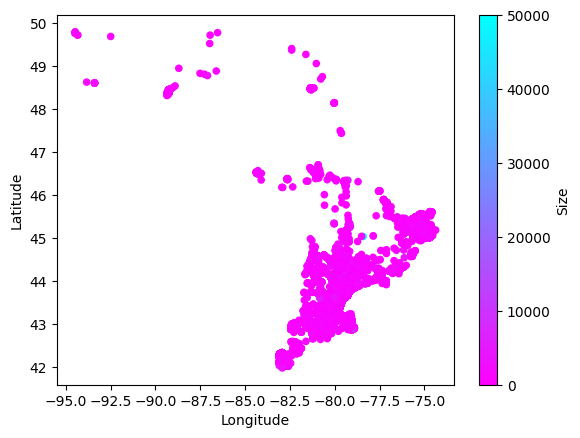

In [28]:
df.plot(x='Longitude',y='Latitude',kind='scatter',c='Size',colormap='cool_r')